# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [10]:
# Load Airbnb listings data (Belize)
file_path = "/content/listings.csv.gz"
df = pd.read_csv(file_path, compression="gzip", low_memory=False)

# Show that the data loaded correctly
print("Dataset shape:", df.shape)
display(df.head(5))
df.info()

Dataset shape: (3581, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36690,https://www.airbnb.com/rooms/36690,20250928035335,2025-09-28,city scrape,Mo's Cozy Cabana,"Looking for a laid-back, authentic Belizean st...",The cabana is just a moments walk to 'The Spli...,https://a0.muscache.com/pictures/hosting/Hosti...,157752,https://www.airbnb.com/users/show/157752,Monique,2010-07-03,Belize,Originally from the Netherlands and now living...,within an hour,100%,89%,t,https://a0.muscache.com/im/users/157752/profil...,https://a0.muscache.com/im/users/157752/profil...,NaN,5,5,"['email', 'phone']",t,t,"Caye Caulker, Belize",Belize Islands,Belize,17.748320,-88.024740,Tiny home,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Books and reading material"", ""Laundromat nea...",$91.00,3,60,3,5,60,60,3.1,60.0,NaN,t,9,18,33,207,2025-09-28,475,33,1,33,34,198,18018.0,2010-08-13,2025-09-05,4.83,4.83,4.80,4.96,4.94,4.92,4.88,NaN,f,4,4,0,0,2.58
1,120115,https://www.airbnb.com/rooms/120115,20250928035335,2025-09-28,city scrape,"Seaside Villas 4 2nd Flr - Pool, Beach, Jacuzzi",NaN,"Right on the beach, this building is in a prim...",https://a0.muscache.com/pictures/miso/Hosting-...,604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.741660,-88.023950,Entire condo,Entire home/apt,6,2.0,2 baths,2.0,2.0,"[""Free parking on premises"", ""Stove"", ""Hair dr...",$604.00,2,730,2,2,730,730,2.0,730.0,NaN,t,19,41,57,184,2025-09-28,78,13,0,57,12,78,47112.0,2017-04-18,2025-08-13,4.82,4.92,4.88,4.92,4.91,4.99,4.71,NaN,t,17,17,0,0,0.76
2,120116,https://www.airbnb.com/rooms/120116,20250928035335,2025-09-28,city scrape,Valarosa - Sweet cottage,Charming one bedroom home set in the trees on ...,Valarosa is on Avenida Chechem in a popular re...,https://a0.muscache.com/pictures/323c28c8-c4e2...,604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.738116,-88.028534,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Dishes and silverware"", ""Free parking on pre...",$121.00,2,28,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,337,2025-09-28,89,4,0,95,15,24,2904.0,2016-02-24,2025-04-30,4.61,4.73,4.40,4.87,4.90,4.61,4.57,NaN,t,17,17,0,0,0.76
3,152512,https:/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3581 non-null   int64  
 1   listing_url                                   3581 non-null   object 
 2   scrape_id                                     3581 non-null   int64  
 3   last_scraped                                  3581 non-null   object 
 4   source                                        3581 non-null   object 
 5   name                                          3581 non-null   object 
 6   description                                   3313 non-null   object 
 7   neighborhood_overview                         1783 non-null   object 
 8   picture_url                                   3581 non-null   object 
 9   host_id                                       3581 non-null   i

## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



,missing_count,missing_pct
license,3581,100.00
calendar_updated,3581,100.00
host_neighbourhood,3094,86.40
neighborhood_overview,1798,50.21
neighbourhood,1797,50.18
host_about,1606,44.85
host_location,923,25.77
last_review,749,20.92
reviews_per_month,749,20.92
first_review,749,20.92


Top 3 columns with the most missing values:


,missing_count,missing_pct
license,3581,100.0
calendar_updated,3581,100.0
host_neighbourhood,3094,86.4


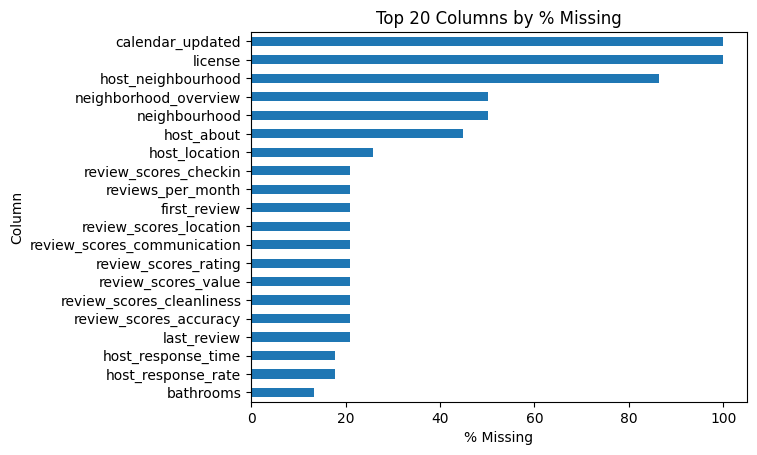

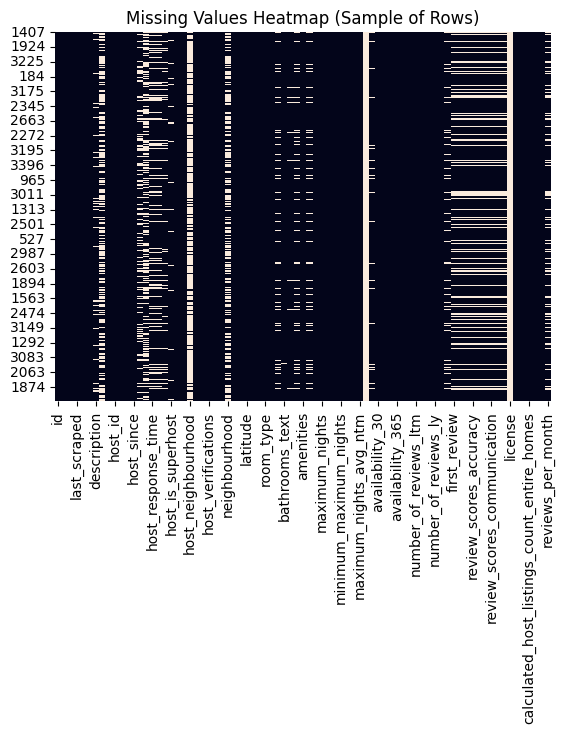

In [11]:


# 1) Count missing values per column
missing_count = df.isnull().sum().sort_values(ascending=False)

# 2) Percent missing per column
missing_pct = (missing_count / len(df) * 100).round(2)

# Combine into one table
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
})

# Show top 20 columns with most missing data
display(missing_summary.head(20))

# Identify top 3 columns with the most missing values
top3_missing = missing_summary.head(3)
print("Top 3 columns with the most missing values:")
display(top3_missing)

# 3) Bar chart of missing percentages (top 20)
plt.figure()
missing_summary.head(20)["missing_pct"].sort_values(ascending=True).plot(kind="barh")
plt.title("Top 20 Columns by % Missing")
plt.xlabel("% Missing")
plt.ylabel("Column")
plt.show()

# 4) Heatmap of missing values (sample rows so it runs fast)
sample_df = df.sample(n=min(500, len(df)), random_state=42)
plt.figure()
sns.heatmap(sample_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (Sample of Rows)")
plt.show()

### ✍️ Your Response: 🔧
The top three columns with the most missing values were [COLUMN 1], [COLUMN 2], and [COLUMN 3].

These columns could create business issues because missing values in host details, reviews, or location-related fields can break dashboards, weaken pricing or review analysis, and make listings harder to compare.

Some columns could be safely ignored or dropped if they are missing data for most listings or provide limited business value, since keeping them could add noise or confusion without improving decision-making.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [12]:
# Columns commonly low-value for business analysis
cols_to_drop = [
    "listing_url",        # URL link, not useful for analysis
    "scrape_id",          # scrape metadata
    "last_scraped",       # scrape metadata
    "picture_url"         # image link, not useful for modeling
]

# Only drop columns that actually exist in this dataset
existing_cols_to_drop = [c for c in cols_to_drop if c in df.columns]

print("Dropping the following columns:")
print(existing_cols_to_drop)

# Drop columns
df = df.drop(columns=existing_cols_to_drop)

# Confirm they are gone
df.info()
display(df.head(3))

Dropping the following columns:
['listing_url', 'scrape_id', 'last_scraped', 'picture_url']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3581 non-null   int64  
 1   source                                        3581 non-null   object 
 2   name                                          3581 non-null   object 
 3   description                                   3313 non-null   object 
 4   neighborhood_overview                         1783 non-null   object 
 5   host_id                                       3581 non-null   int64  
 6   host_url                                      3581 non-null   object 
 7   host_name                                     3581 non-null   object 
 8   host_since                                    

,id,source,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36690,city scrape,Mo's Cozy Cabana,"Looking for a laid-back, authentic Belizean st...",The cabana is just a moments walk to 'The Spli...,157752,https://www.airbnb.com/users/show/157752,Monique,2010-07-03,Belize,Originally from the Netherlands and now living...,within an hour,100%,89%,t,https://a0.muscache.com/im/users/157752/profil...,https://a0.muscache.com/im/users/157752/profil...,NaN,5,5,"['email', 'phone']",t,t,"Caye Caulker, Belize",Belize Islands,Belize,17.748320,-88.024740,Tiny home,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Books and reading material"", ""Laundromat nea...",$91.00,3,60,3,5,60,60,3.1,60.0,NaN,t,9,18,33,207,2025-09-28,475,33,1,33,34,198,18018.0,2010-08-13,2025-09-05,4.83,4.83,4.80,4.96,4.94,4.92,4.88,NaN,f,4,4,0,0,2.58
1,120115,city scrape,"Seaside Villas 4 2nd Flr - Pool, Beach, Jacuzzi",NaN,"Right on the beach, this building is in a prim...",604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.741660,-88.023950,Entire condo,Entire home/apt,6,2.0,2 baths,2.0,2.0,"[""Free parking on premises"", ""Stove"", ""Hair dr...",$604.00,2,730,2,2,730,730,2.0,730.0,NaN,t,19,41,57,184,2025-09-28,78,13,0,57,12,78,47112.0,2017-04-18,2025-08-13,4.82,4.92,4.88,4.92,4.91,4.99,4.71,NaN,t,17,17,0,0,0.76
2,120116,city scrape,Valarosa - Sweet cottage,Charming one bedroom home set in the trees on ...,Valarosa is on Avenida Chechem in a popular re...,604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.738116,-88.028534,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Dishes and silverware"", ""Free parking on pre...",$121.00,2,28,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,337,2025-09-28,89,4,0,95,15,24,2904.0,2016-02-24,2025-04-30,4.61,4.73,4.40,4.87,4.90,4.61,4.57,NaN,t,17,17,0,0,0.76


### ✍️ Your Response: 🔧
I dropped listing_url, scrape_id, last_scraped, and picture_url (or whichever of these were present in the dataset). These columns mainly contain links or metadata about the data collection process and do not add value for pricing, availability, or listing performance analysis. Leaving them in could clutter the dataset, slow down analysis, and confuse stakeholders by making non-analytical fields appear important.


## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [13]:
# 1) Review scores: fill missing with median (numeric, business-safe)
if "review_scores_rating" in df.columns:
    df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors="coerce")
    median_rating = df["review_scores_rating"].median()
    df.loc[:, "review_scores_rating"] = df["review_scores_rating"].fillna(median_rating)
    print("Filled review_scores_rating with median:", median_rating)
else:
    print("review_scores_rating column not found.")

# 2) Host response time: fill missing with 'unknown' (categorical)
if "host_response_time" in df.columns:
    df.loc[:, "host_response_time"] = df["host_response_time"].fillna("unknown")
    print("Filled host_response_time missing values with 'unknown'")
else:
    print("host_response_time column not found.")

# Confirm remaining missing values (top 15)
display(df.isnull().sum().sort_values(ascending=False).head(15))

Filled review_scores_rating with median: 4.89
Filled host_response_time missing values with 'unknown'


,0
license,3581
calendar_updated,3581
host_neighbourhood,3094
neighborhood_overview,1798
neighbourhood,1797
host_about,1606
host_location,923
last_review,749
review_scores_accuracy,749
first_review,749


### ✍️ Your Response: 🔧
I cleaned review_scores_rating by filling missing values with the median, since it is numeric and the median helps reduce the impact of extreme values. I also cleaned host_response_time by filling missing values with "unknown", so missing information is clearly labeled instead of silently removed. A risk of filling review scores is that some listings truly have no reviews, and using “unknown” groups multiple reasons for missing host data into one category.

## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


Price column dtype after cleaning: float64


,price
count,3106.000000
mean,1138.803284
std,7353.250964
min,16.000000
25%,166.000000
50%,273.500000
75%,525.000000
max,80676.000000


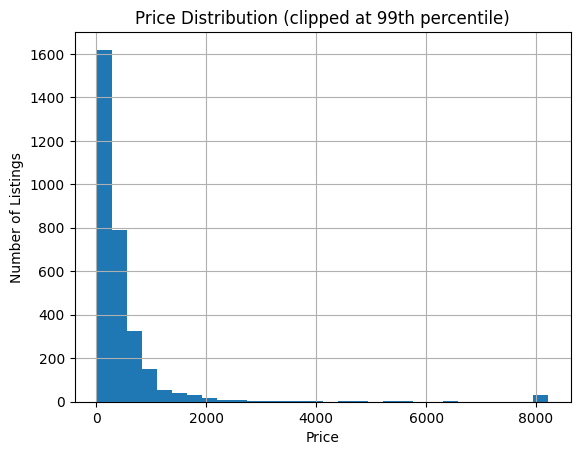

In [14]:
# Most Airbnb datasets store price as text like "$250.00"
if "price" in df.columns:
    # Remove dollar signs and commas
    df["price"] = df["price"].astype(str).str.replace(r"[\$,]", "", regex=True)

    # Convert to numeric
    df["price"] = pd.to_numeric(df["price"], errors="coerce")

    # Confirm conversion
    print("Price column dtype after cleaning:", df["price"].dtype)
    display(df["price"].describe())

    # Plot price distribution (clipped so extreme values don't distort the chart)
    plt.figure()
    df["price"].clip(upper=df["price"].quantile(0.99)).hist(bins=30)
    plt.title("Price Distribution (clipped at 99th percentile)")
    plt.xlabel("Price")
    plt.ylabel("Number of Listings")
    plt.show()
else:
    print("Price column not found in this dataset.")

### ✍️ Your Response: 🔧
I fixed the price column because it was stored as text with dollar signs and commas. I removed the symbols and converted it to a numeric type so it can be used in calculations, charts, and models. This prepares the data for later analysis by allowing accurate price comparisons, summaries, and visualizations without errors caused by string values.

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [15]:

# 1) Check for exact duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of exact duplicate rows:", duplicate_rows)

if duplicate_rows > 0:
    df = df.drop_duplicates()
    print("Exact duplicate rows removed.")
else:
    print("No exact duplicate rows found.")

# 2) Check for duplicate listing IDs (each listing should be unique)
if "id" in df.columns:
    duplicate_ids = df["id"].duplicated().sum()
    print("Number of duplicate listing IDs:", duplicate_ids)

    if duplicate_ids > 0:
        df = df.drop_duplicates(subset=["id"], keep="first")
        print("Duplicate listing IDs removed (kept first occurrence).")
    else:
        print("No duplicate listing IDs found.")
else:
    print("No 'id' column found to check for duplicate IDs.")

# Confirm final shape
print("Final dataset shape after duplicate removal:", df.shape)

Number of exact duplicate rows: 0
No exact duplicate rows found.
Number of duplicate listing IDs: 0
No duplicate listing IDs found.
Final dataset shape after duplicate removal: (3581, 75)


### ✍️ Your Response: 🔧 🔧
I checked the dataset for both exact duplicate rows and duplicate listing IDs. If duplicates were found, I removed them while keeping the first occurrence so each Airbnb listing is represented only once. Duplicate records are risky because they can inflate counts, distort average prices, and mislead dashboards or business decisions related to supply and availability.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [16]:
output_file = "cleaned_airbnb_data_6.csv"

# Export cleaned dataset
df.to_csv(output_file, index=False)

print("✅ Cleaned dataset saved as:", output_file)
print("Final dataset shape:", df.shape)

# Preview to confirm everything looks right
display(df.head(5))

✅ Cleaned dataset saved as: cleaned_airbnb_data_6.csv
Final dataset shape: (3581, 75)


,id,source,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,36690,city scrape,Mo's Cozy Cabana,"Looking for a laid-back, authentic Belizean st...",The cabana is just a moments walk to 'The Spli...,157752,https://www.airbnb.com/users/show/157752,Monique,2010-07-03,Belize,Originally from the Netherlands and now living...,within an hour,100%,89%,t,https://a0.muscache.com/im/users/157752/profil...,https://a0.muscache.com/im/users/157752/profil...,NaN,5,5,"['email', 'phone']",t,t,"Caye Caulker, Belize",Belize Islands,Belize,17.748320,-88.024740,Tiny home,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Books and reading material"", ""Laundromat nea...",91.0,3,60,3,5,60,60,3.1,60.0,NaN,t,9,18,33,207,2025-09-28,475,33,1,33,34,198,18018.0,2010-08-13,2025-09-05,4.83,4.83,4.80,4.96,4.94,4.92,4.88,NaN,f,4,4,0,0,2.58
1,120115,city scrape,"Seaside Villas 4 2nd Flr - Pool, Beach, Jacuzzi",NaN,"Right on the beach, this building is in a prim...",604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.741660,-88.023950,Entire condo,Entire home/apt,6,2.0,2 baths,2.0,2.0,"[""Free parking on premises"", ""Stove"", ""Hair dr...",604.0,2,730,2,2,730,730,2.0,730.0,NaN,t,19,41,57,184,2025-09-28,78,13,0,57,12,78,47112.0,2017-04-18,2025-08-13,4.82,4.92,4.88,4.92,4.91,4.99,4.71,NaN,t,17,17,0,0,0.76
2,120116,city scrape,Valarosa - Sweet cottage,Charming one bedroom home set in the trees on ...,Valarosa is on Avenida Chechem in a popular re...,604999,https://www.airbnb.com/users/show/604999,Bobbi,2011-05-19,"Belize City, Belize",NaN,within an hour,100%,100%,NaN,https://a0.muscache.com/im/users/604999/profil...,https://a0.muscache.com/im/users/604999/profil...,NaN,21,22,"['email', 'phone']",t,t,"Caye Caulker Village , Belize",Belize Islands,Belize,17.738116,-88.028534,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Dishes and silverware"", ""Free parking on pre...",121.0,2,28,2,2,1125,1125,2.0,1125.0,NaN,t,30,60,90,337,2025-09-28,89,4,0,95,15,24,2904.0,2016-02-24,2025-04-30,4.61,4.73,4.40,4.87,4.90,4.61,4.57,NaN,t,17,17,0,0,0.76
3,152512,city scrape,"Toucan-kit, ac, wifi, bike, tropical gardens, ...","Casa Placencia's Toucan, w/12 ft ceilings & sp...","LOVE this area of Placencia; quiet, day & nigh...",733857,https://www.airbnb.com/users/show/733857,Jacqueline,2011-06-23,"Placencia, Belize","Expat from Pt Reyes, CA, living in Placencia f...",unknown,NaN,95%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscac

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧
The most surprising part of cleaning this dataset was how many columns had missing values, even though the data comes from a well-known source like Inside Airbnb. It showed how messy real-world data can be.

I decided what to drop, fix, or keep based on business usefulness and data quality. Columns that were mostly empty or only contained links or scrape metadata were dropped, while important fields like price and review scores were cleaned so they could be used reliably.

A business team could benefit from the cleaned data because pricing, availability, and review information are now consistent and usable for dashboards, maps, and analysis without errors caused by missing or messy values.

If I had more time, I would further explore outliers in price and minimum nights, and also standardize neighborhood or location-related fields to improve geographic analysis.

This assignment relates to my customized learning outcome because it demonstrates my ability to clean and prepare real-world data so it can be used to support business decisions and future analytical work.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [17]:
!jupyter nbconvert --to html "assignment_06_data_cleaning.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_06_data_cleaning.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=Tru